In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
# from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc

In [2]:
iris = datasets.load_iris()

In [3]:
X, y = iris.data, iris.target
class_names = iris.target_names

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) #Trees grow to a maximum depth of 2

In [7]:
tree_clf.fit(X_train, y_train) 
y_pred = tree_clf.predict(X_test)

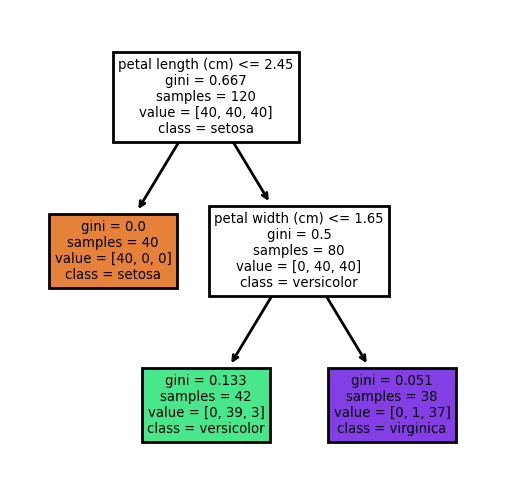

In [10]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3, 3), dpi=200)
axes.plot(linewidth =0)
_ = plot_tree(tree_clf,
               feature_names = iris.feature_names, 
               class_names=iris.target_names,
               filled = True,)

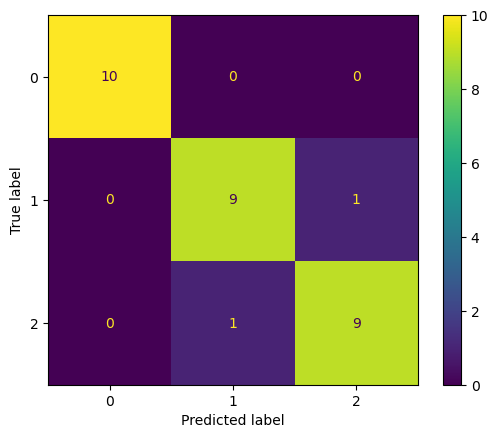

In [11]:
cm = confusion_matrix(y_test,y_pred,labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.show()


In [27]:
from sklearn.metrics import classification_report


In [30]:
tree_clf.score(X_test,y_test)

0.9333333333333333

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### Diabetes

In [3]:
data = pd.read_csv("data/diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)

In [18]:
# model = DecisionTreeClassifier(max_depth=2, random_state=42) #Trees grow to a maximum depth of 2
model = DecisionTreeClassifier(random_state=42)

In [19]:
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

[Text(0.49653633004926107, 0.9705882352941176, 'x[1] <= 127.5\ngini = 0.456\nsamples = 614\nvalue = [398, 216]'),
 Text(0.21905788177339902, 0.9117647058823529, 'x[7] <= 28.5\ngini = 0.333\nsamples = 393\nvalue = [310, 83]'),
 Text(0.07142857142857142, 0.8529411764705882, 'x[5] <= 30.95\ngini = 0.152\nsamples = 218\nvalue = [200, 18]'),
 Text(0.029556650246305417, 0.7941176470588235, 'x[0] <= 7.5\ngini = 0.031\nsamples = 125\nvalue = [123, 2]'),
 Text(0.019704433497536946, 0.7352941176470589, 'x[6] <= 0.668\ngini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.009852216748768473, 0.6764705882352942, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]'),
 Text(0.029556650246305417, 0.6764705882352942, 'x[6] <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.019704433497536946, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03940886699507389, 0.6176470588235294, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.03940886699507389, 0.7352941176470589

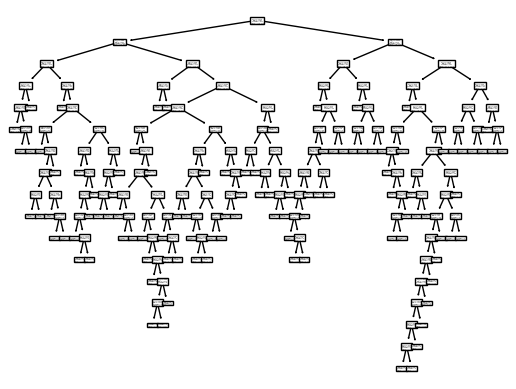

In [20]:
plot_tree(model)

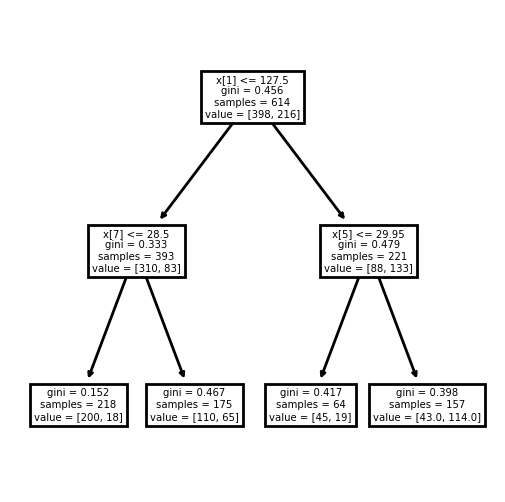

In [8]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3, 3), dpi=200)
axes.plot(linewidth =0)
_ = plot_tree(model)
            #    feature_names = [0,1], 
            #    class_names=['Yes','No'],
            #    filled = True,)

In [63]:
model.score(X_test,y_test)

0.8051948051948052

In [10]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

In [11]:
model_SVC.score(X_test,y_test)

0.8181818181818182

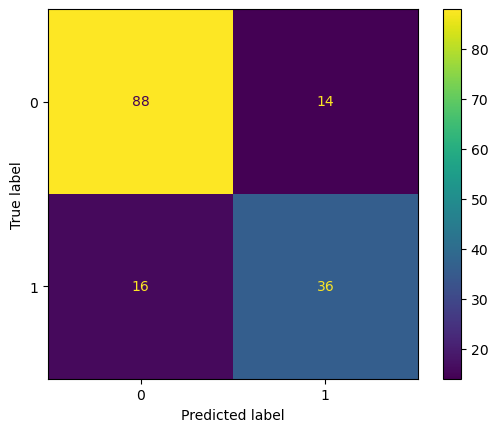

In [13]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       102
           1       0.72      0.69      0.71        52

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.80      0.81      0.80       154



In [15]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

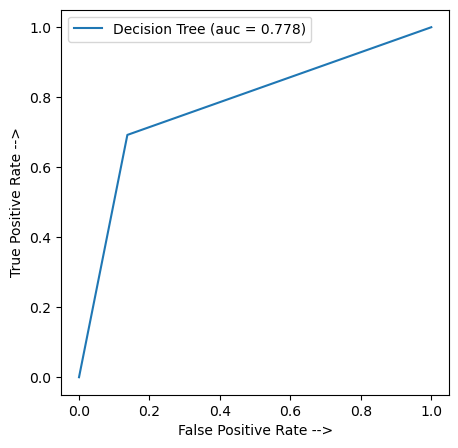

In [17]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='Decision Tree (auc = %0.3f)' % auc)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()